In [1]:
import json
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, PchipInterpolator
from battery_utils import cs_r0, cs_r1, cs_r2, cs_c1, cs_c2, v_inf, v_sup, v_mid

In [2]:
with open('../data/coef.json', 'r') as f:
    coef = json.load(f)

## Teste de Interpolação pelo Tempo

In [3]:
def plot_inter(t, y, title=''):
    i_t = np.arange(t[0],t[-1],100)
    i_y = CubicSpline(t, y, extrapolate=True)
    plt.figure(figsize=(15, 5))
    plt.title(title)
    sns.scatterplot(x=t, y=y, label='Original', color='red')
    sns.lineplot(x=i_t, y=i_y(i_t), label='Interpolado')
    plt.show()
    plt.close()

In [4]:
#v0, v1, v2 012
#tau1, tau2 34
#r0, r1, r2, c1, c2 56789
#vmin, vmax, v_r0, t0
def plot_all(I):
    t = [coef[I][c][-1] for c in coef[I]]
    r0 = [coef[I][c][5] for c in coef[I]]
    r1 = [coef[I][c][6] for c in coef[I]]
    r2 = [coef[I][c][7] for c in coef[I]]
    c1 = [coef[I][c][8] for c in coef[I]]
    c2 = [coef[I][c][9] for c in coef[I]]
    vmax = [coef[I][c][11] for c in coef[I]]

    plot_inter(t, r0, 'r0')
    plot_inter(t, r1, 'r1')
    plot_inter(t, r2, 'r2')
    plot_inter(t, c1, 'c1')
    plot_inter(t, c2, 'c2')
    plot_inter(t, vmax, 'vmax')

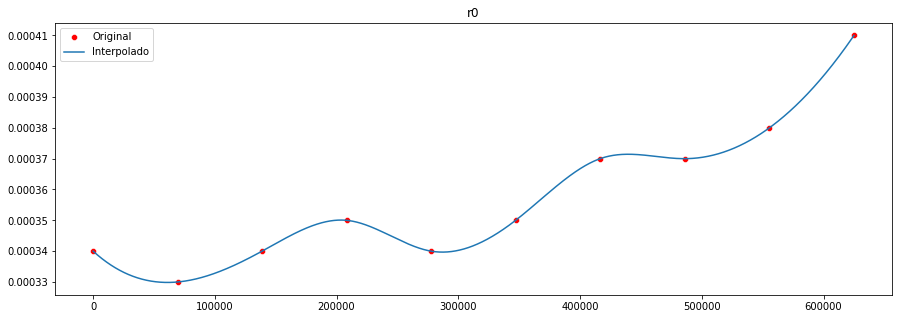

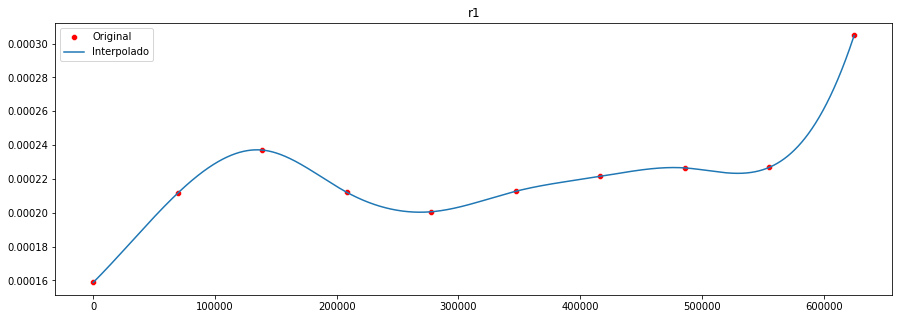

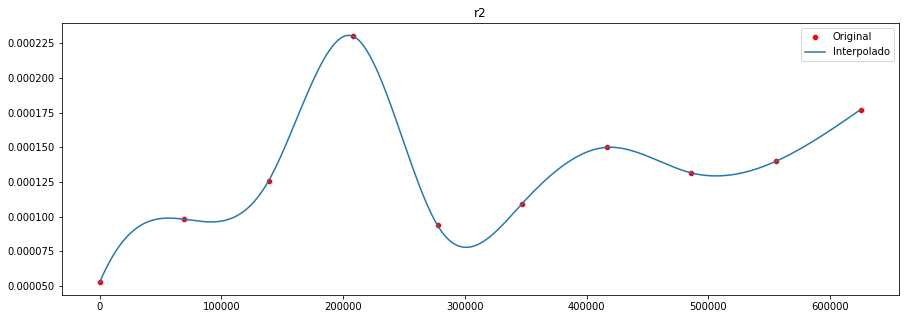

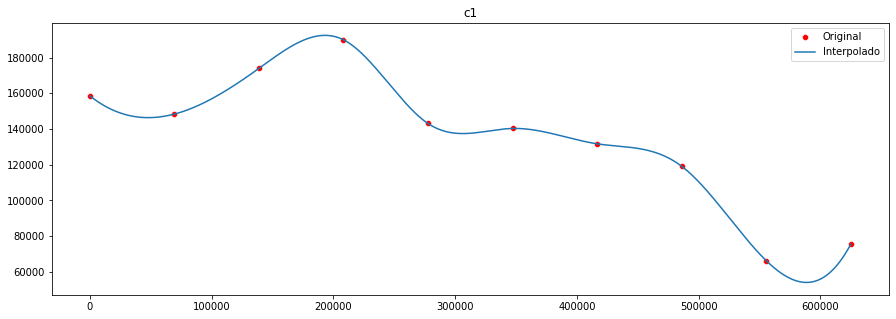

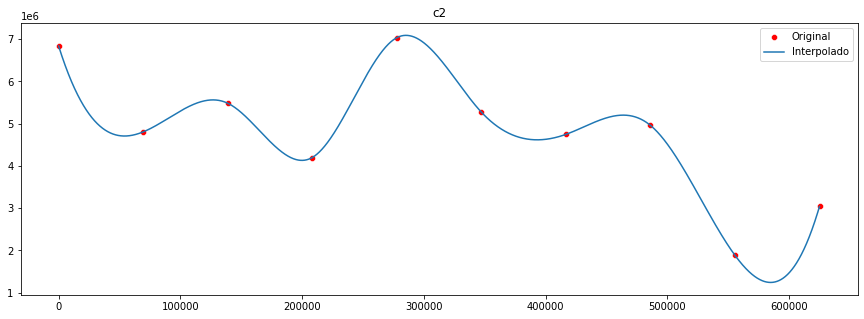

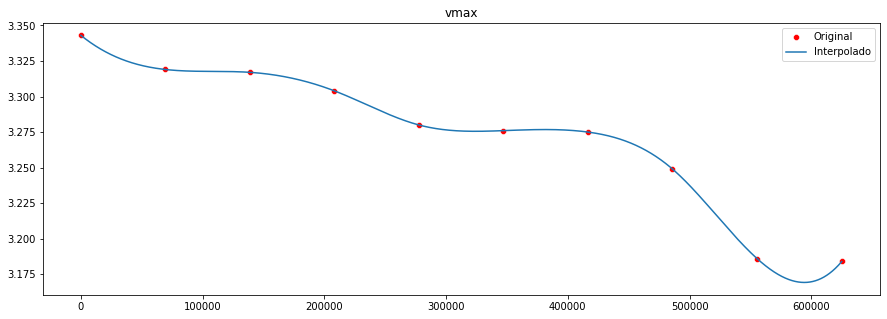

In [5]:
plot_all('100A')

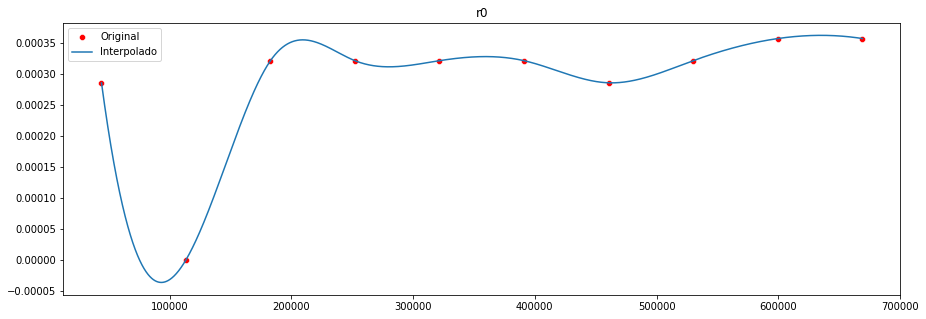

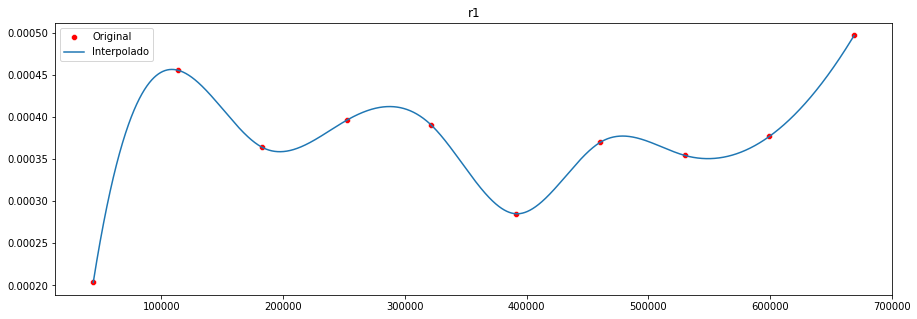

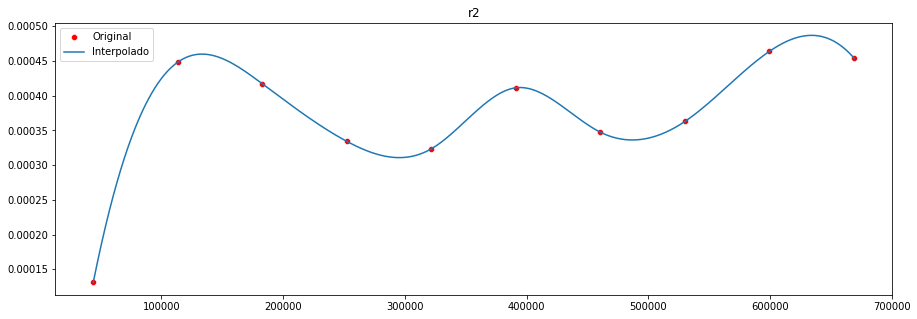

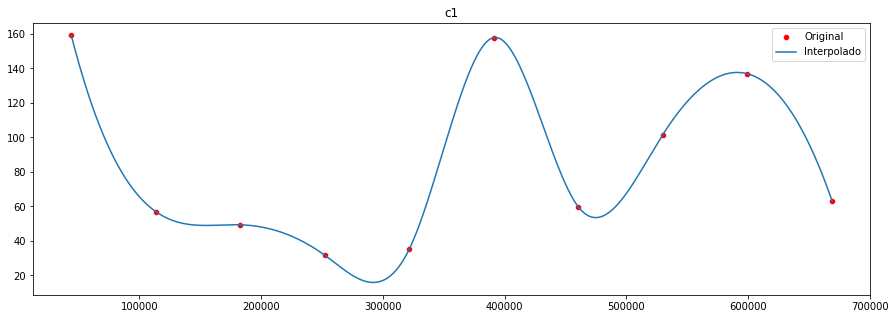

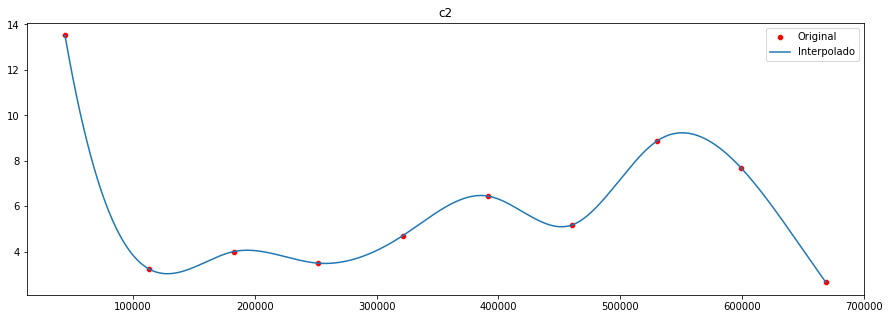

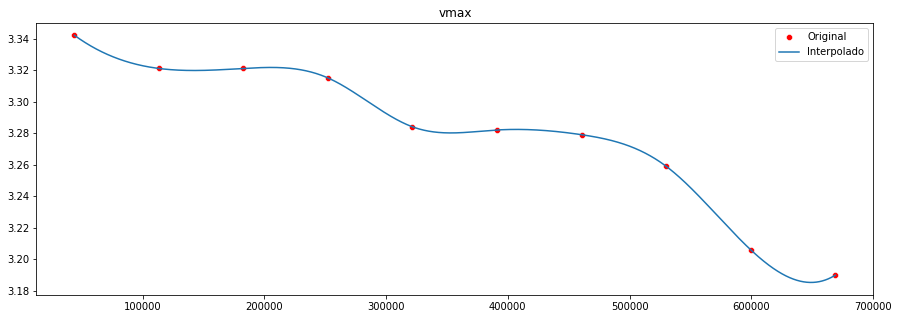

In [6]:
plot_all('28A')

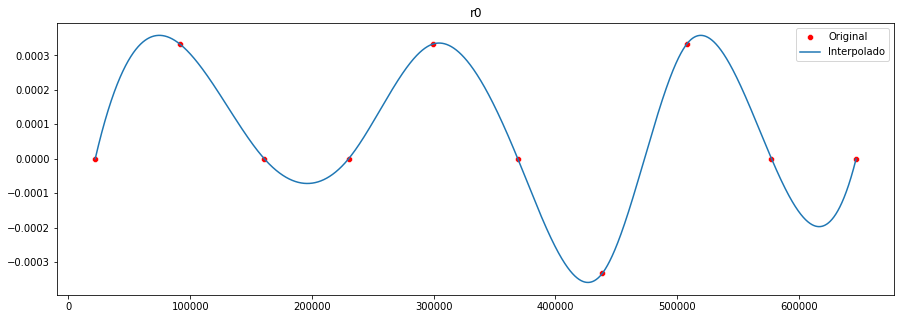

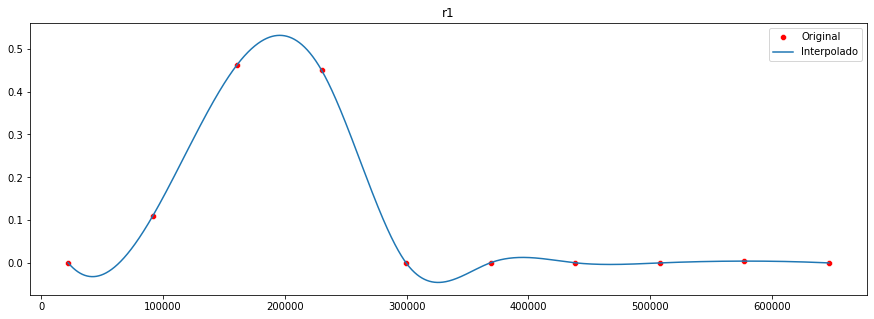

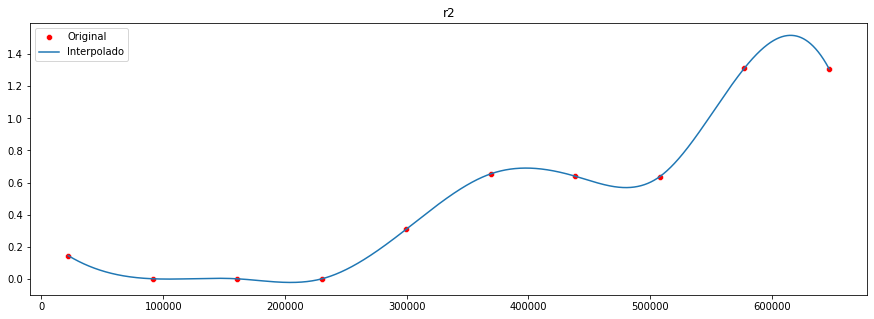

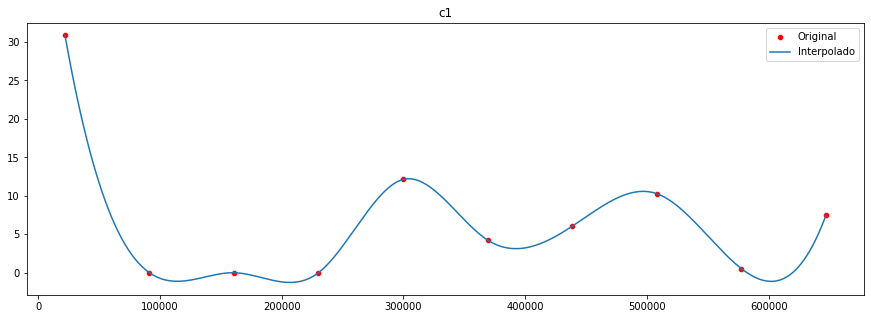

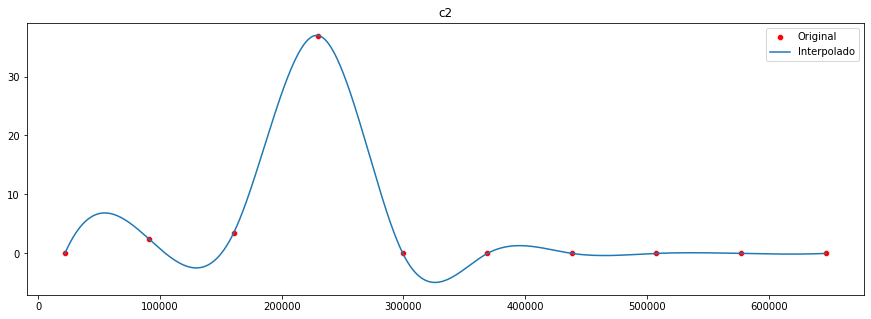

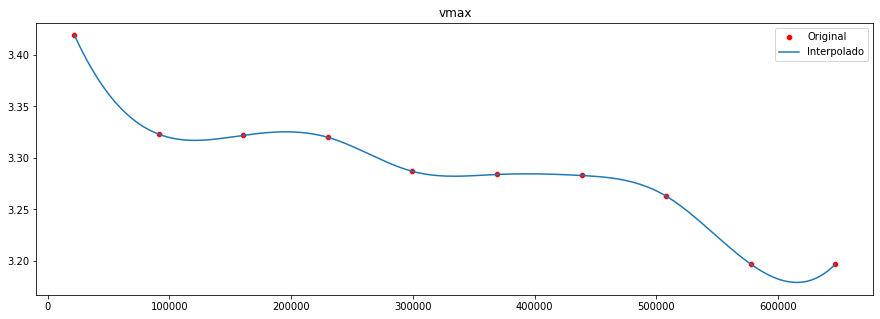

In [7]:
plot_all('3A')

## Interpolação em razão de OCV

In [8]:
def cs_base():
    indexes = dict()
    I = '100A'

    with open('../data/coef.json', 'r') as f:
        coef = json.load(f)
        v = [coef[I][c][11] for c in coef[I]][-1::-1]

    def inner(index):
        nonlocal indexes
        if index in indexes:
            return indexes[index]
        
        with open('../data/coef.json', 'r') as f:
            coef = json.load(f)
        coef = np.array([coef[I][c][index] for c in coef[I]])[-1::-1]

        interpolation = PchipInterpolator(v, coef)
        indexes[index] = interpolation

        return interpolation
    
    return inner

cs_inner = cs_base()

def cs_generico(index, v):
    return cs_inner(index)(v)

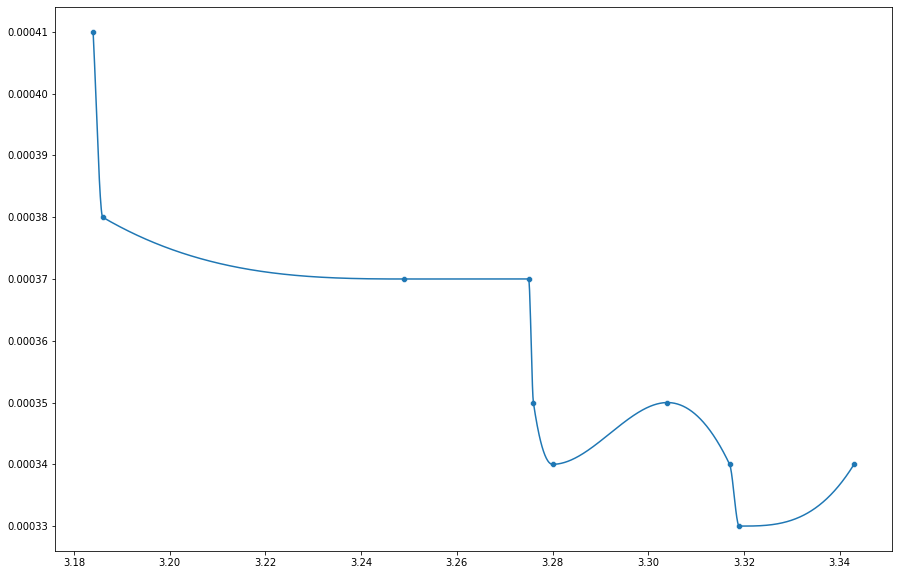

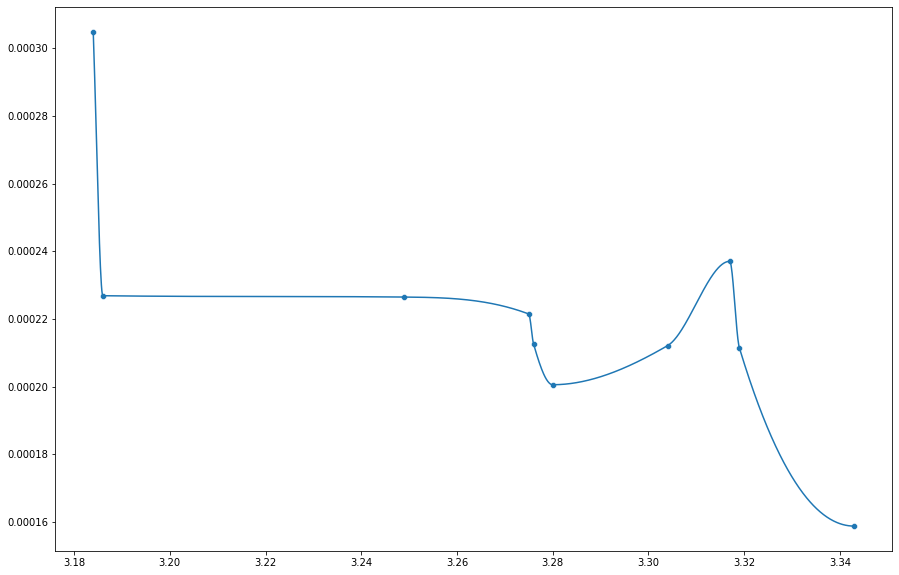

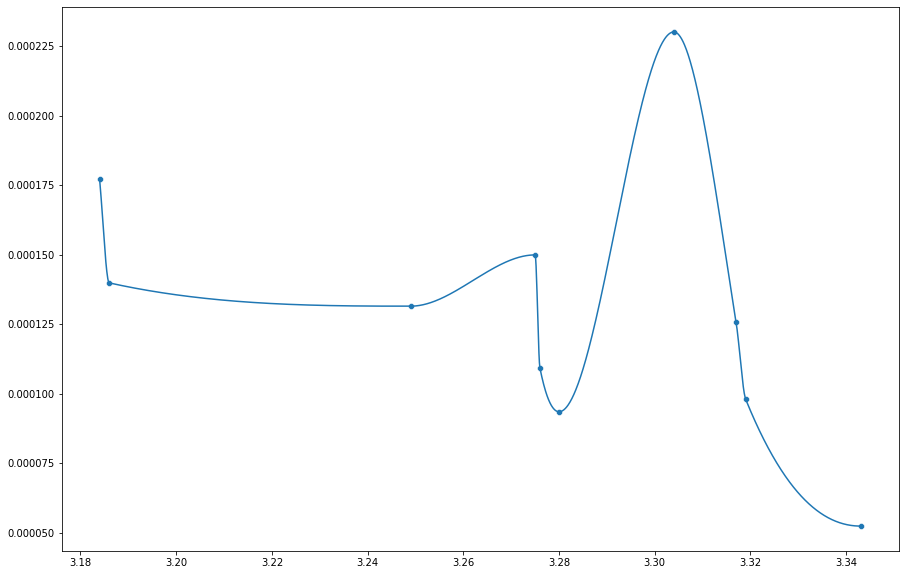

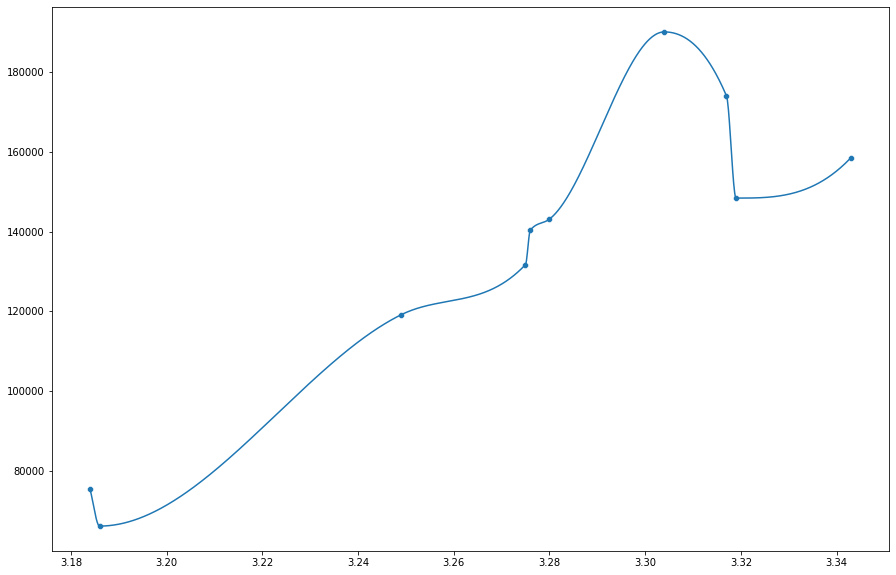

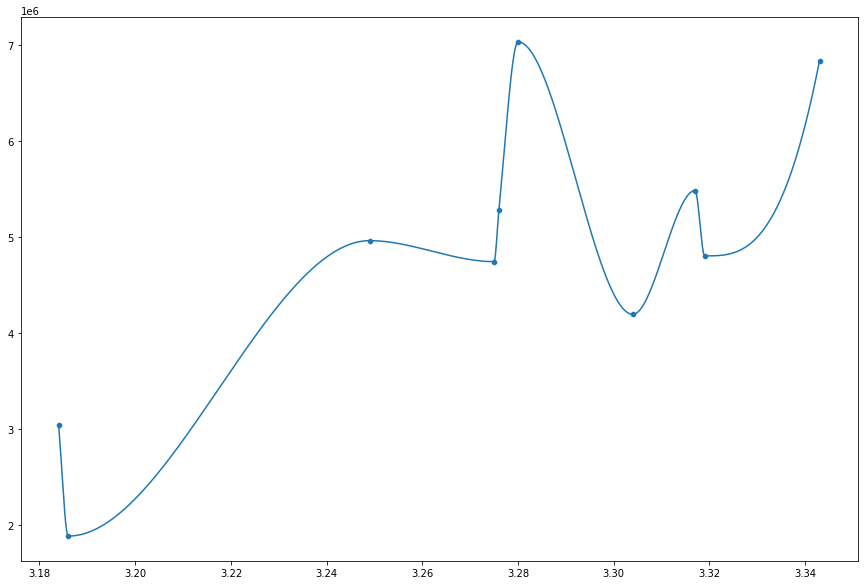

In [9]:
I='100A'
vmax = np.array([coef[I][c][11] for c in coef[I]])
for index in range(5,10):

    c = [coef[I][c][index] for c in coef[I]]
    v = np.arange(vmax.min(), vmax.max(), 0.0001)

    plt.figure(figsize=(15, 10))
    sns.scatterplot(x=vmax, y=c)
    sns.lineplot(x=v, y=cs_generico(index, v))
    plt.show()
    plt.close()

## Interpolação de pelo SoC

In [12]:
def cs_base():
    indexes = dict()
    I = '100A'
    soc = np.array([0.99992121, 0.89972373, 0.80011121, 0.70018156, 0.59969705,
                    0.49886181, 0.39787608, 0.29648346, 0.19333107, 0.08972434])[-1::-1]

    def inner(index):
        nonlocal indexes
        if index in indexes:
            return indexes[index]
        
        with open('../data/coef.json', 'r') as f:
            coef = json.load(f)
        coef = np.array([coef[I][c][index] for c in coef[I]])[-1::-1]

        interpolation = CubicSpline(soc, coef)
        indexes[index] = interpolation

        return interpolation
    
    return inner

cs_inner = cs_base()

def cs_generico(index, soc):
    return cs_inner(index)(soc)

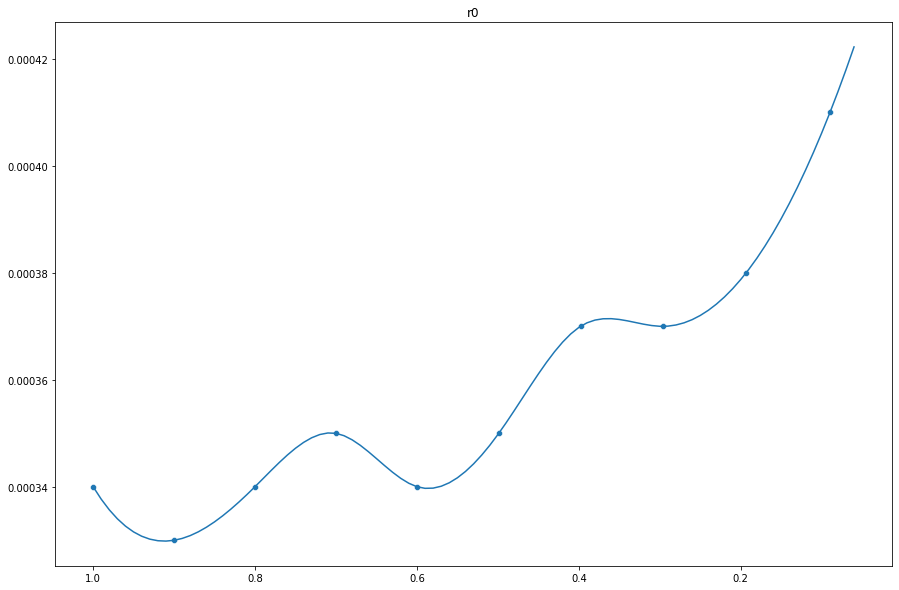

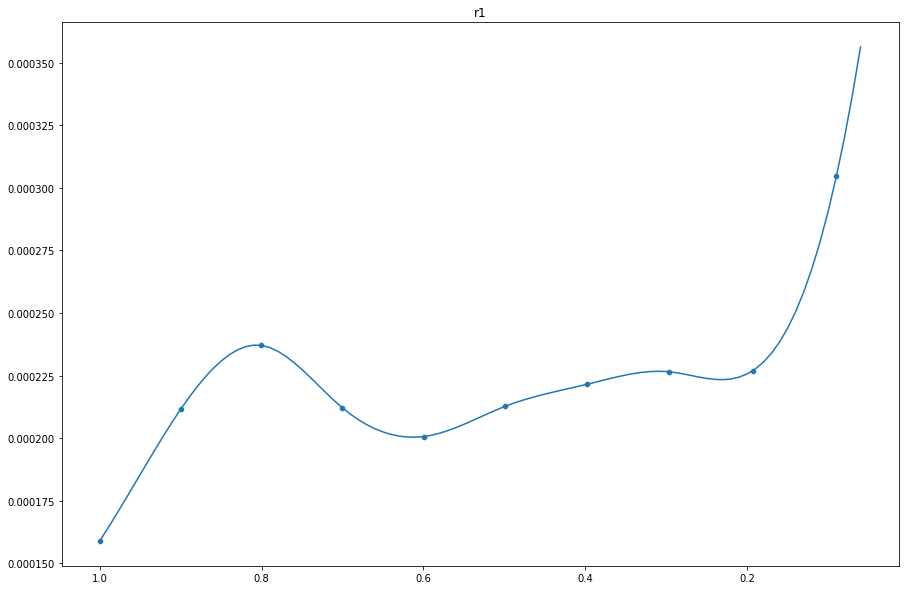

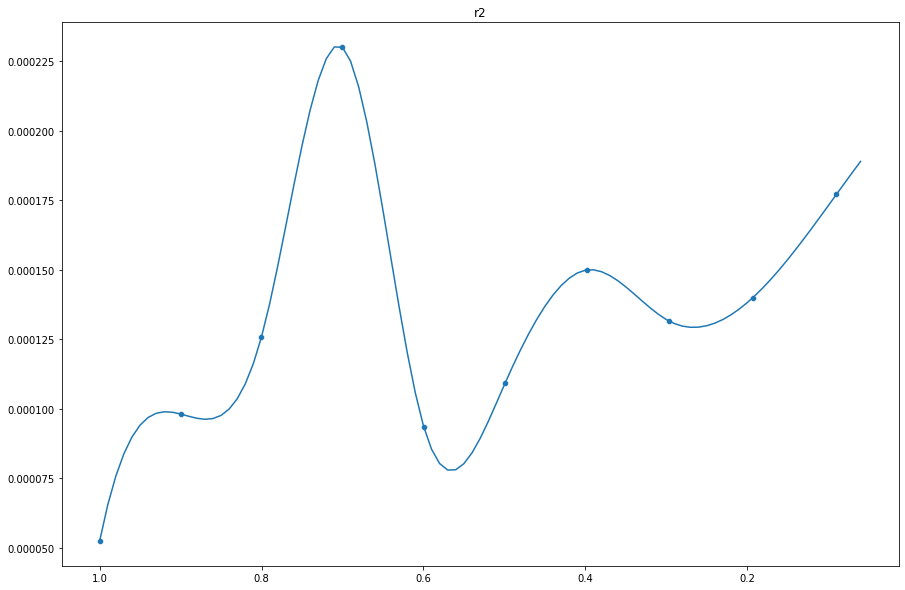

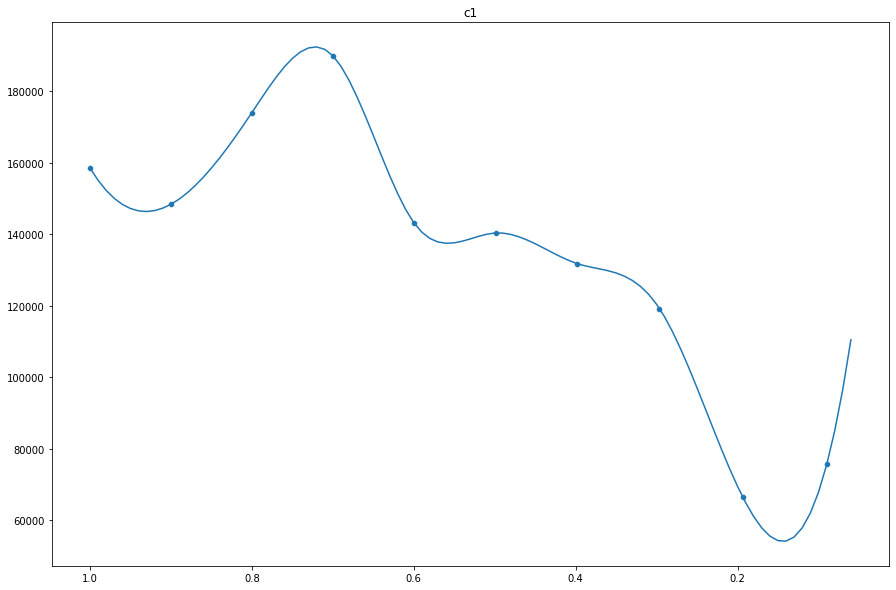

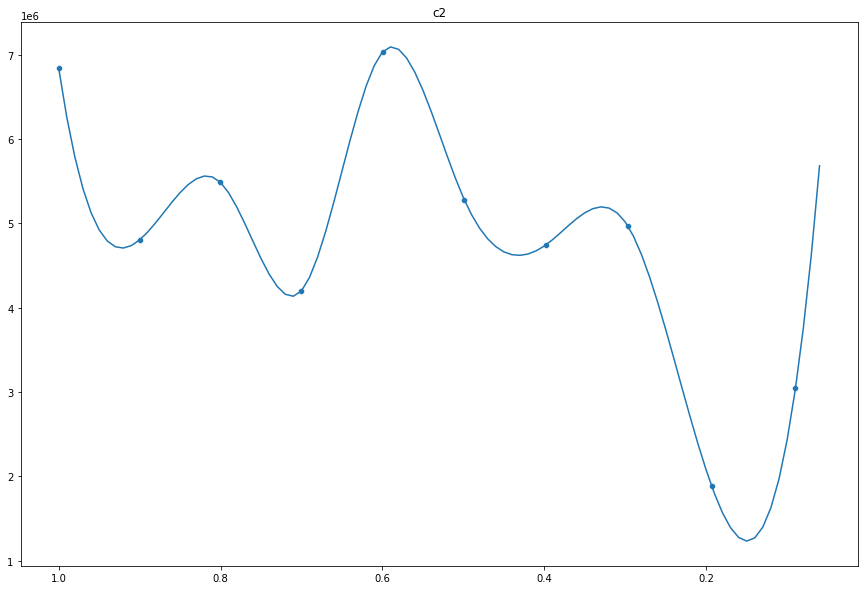

In [21]:
I='100A'
vmax = np.array([coef[I][c][11] for c in coef[I]])
title = ['r0', 'r1', 'r2', 'c1', 'c2', 'vmax']
for index in range(5,10):

    c = [coef[I][c][index] for c in coef[I]]
    soc0 = np.array([0.99992121, 0.89972373, 0.80011121, 0.70018156, 0.59969705,
                    0.49886181, 0.39787608, 0.29648346, 0.19333107, 0.08972434])
    soc = ((100-np.arange(95))/100)

    plt.figure(figsize=(15, 10))
    plt.title(title[index-5])
    sns.scatterplot(x=soc0, y=c)
    ax = sns.lineplot(x=soc, y=cs_generico(index, soc))
    ax.invert_xaxis()
    plt.show()
    plt.close()